 |FEATURES|DESCRPTION|
 |-----|-----|
 |Title| The title of the book|
 |Author| The author(s) of the book|
 |Edition| The edition of the book eg (Paperback,– Import, 26 Apr 2018) |
 |Reviews|The customer reviews about the book|
 |Ratings|The customer ratings of the book|
 |Synopsis:| The synopsis of the book|
 |Genre:| The genre the book belongs to BookCategory|
 |BookCategory: |The department the book is usually available at. |
 |Price: | The price of the book (Target variable)|
 
 
## The problem statement is predict the price of book

 Size of training set: 6237 records Size of test set: 1560 records 

Hypothesis generation:
1. Is price of books  depends on author
2. is price of book depends upon edition 
3. are more review means higher price?
4. are higher rating mean higher price?
5. is genre of book make any sense to price?
6. is price of book depends on bookcategory


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,KFold
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,f1_score,confusion_matrix


In [75]:
book_data = pd.read_excel('Data_train.xlsx')
book_data1 =pd.read_excel('Data_test.xlsx')
ss =pd.read_excel('Sample_Submission.xlsx')

In [5]:
print(book_data.shape)
print(book_data1.shape)
6237+1560



(6237, 9)
(1560, 8)


7797

In [6]:
book_data['Price'].describe()

count     6237.000000
mean       560.707516
std        690.110657
min         25.000000
25%        249.180000
50%        373.000000
75%        599.000000
max      14100.000000
Name: Price, dtype: float64

In [7]:
df = pd.concat([book_data, book_data1], axis=0).reset_index(drop = True)
df

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62
...,...,...,...,...,...,...,...,...,...
7792,100 Things Every Designer Needs to Know About ...,Susan Weinschenk,"Paperback,– 14 Apr 2011",5.0 out of 5 stars,4 customer reviews,We design to elicit responses from people. We ...,Design,"Computing, Internet & Digital Media",NaN
7793,"Modern Letter Writing Course: Personal, Busine...",ARUN SAGAR,"Paperback,– 8 May 2013",3.6 out of 5 stars,13 customer reviews,"A 30-day course to write simple, sharp and att...",Children's Reference (Books),"Biographies, Diaries & True Accounts",NaN
7794,The Kite Runner Graphic Novel,Khaled Hosseini,"Paperback,– 6 Sep 2011",4.0 out of 5 stars,5 customer reviews,The perennial bestseller-now available as a se...,Humour (Books),Humour,NaN
7795,Panzer Leader (Penguin World War II Collection),Heinz Guderian,"Paperback,– 22 Sep 2009",3.5 out of 5 stars,3 customer reviews,Heinz Guderian - master of the Blitzkrieg and ...,United States History,"Biographies, Diaries & True Accounts",NaN


df = pd.read_excel('Data_train.xlsx')

In [8]:
print(f' the data contains {df.shape[0]} values  and {(df.shape[1])-1} features')

 the data contains 7797 values  and 8 features


In [9]:
df.columns

Index(['Title', 'Author', 'Edition', 'Reviews', 'Ratings', 'Synopsis', 'Genre',
       'BookCategory', 'Price'],
      dtype='object')

In [10]:
df.head(3)

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00


As we see the reviews and ratings columns names are interchanged, we should swap them

In [11]:
#changing the name of columns
df.rename(columns={'Reviews':'Rating',
                 'Ratings':'Review'},inplace=True)

In [12]:
df.head(3)

,Title,Author,Edition,Rating,Review,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7797 entries, 0 to 7796
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         7797 non-null   object 
 1   Author        7797 non-null   object 
 2   Edition       7797 non-null   object 
 3   Rating        7797 non-null   object 
 4   Review        7797 non-null   object 
 5   Synopsis      7797 non-null   object 
 6   Genre         7797 non-null   object 
 7   BookCategory  7797 non-null   object 
 8   Price         6237 non-null   float64
dtypes: float64(1), object(8)
memory usage: 548.4+ KB


As we see the ratings and reviews are stored as string hence it shows object as datatype, we need to convert rating into float datatype and review as integer

In [14]:
df['Rating'] = df['Rating'].map(lambda x : float(x.split()[0]) )

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7797 entries, 0 to 7796
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         7797 non-null   object 
 1   Author        7797 non-null   object 
 2   Edition       7797 non-null   object 
 3   Rating        7797 non-null   float64
 4   Review        7797 non-null   object 
 5   Synopsis      7797 non-null   object 
 6   Genre         7797 non-null   object 
 7   BookCategory  7797 non-null   object 
 8   Price         6237 non-null   float64
dtypes: float64(2), object(7)
memory usage: 548.4+ KB


In [16]:
df.head(2)

,Title,Author,Edition,Rating,Review,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93


In [17]:
df['Review'] = df['Review'].map(lambda x : (x.split()[0]))

In [18]:

df['Review'] = df['Review'].map(lambda x : (x.split(',')))

In [19]:
df['Review'] = df['Review'].map(lambda x : int(''.join(x)))


In [20]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7797 entries, 0 to 7796
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         7797 non-null   object 
 1   Author        7797 non-null   object 
 2   Edition       7797 non-null   object 
 3   Rating        7797 non-null   float64
 4   Review        7797 non-null   int64  
 5   Synopsis      7797 non-null   object 
 6   Genre         7797 non-null   object 
 7   BookCategory  7797 non-null   object 
 8   Price         6237 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 548.4+ KB


In [21]:
df.head(2)

,Title,Author,Edition,Rating,Review,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0,8,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9,14,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93


In [22]:
df.groupby('Author')['Price'].count()

Author
0, Butterfield, Ngondi, Kerr       1
0, Jonathan Law                    0
0, Jonathan Law, Richard Rennie    1
0, Kerr, Wright                    1
0, Rennie, Law                     1
                                  ..
Zygmunt Miloszewski                1
dodie                              1
r.h. Sin                           1
renu and neena kaul                1
sister Jesme                       1
Name: Price, Length: 4372, dtype: int64

In [23]:
df['Author']=df['Author'].map(lambda x : ''.join(x[2:]) if x.split(',')[0]=='0' else x)

In [24]:
df.groupby('Author')['Price'].count()

Author
 Butterfield, Ngondi, Kerr       1
 Jonathan Law                    0
 Jonathan Law, Richard Rennie    1
 Kerr, Wright                    1
 Rennie, Law                     1
                                ..
Zygmunt Miloszewski              1
dodie                            1
r.h. Sin                         1
renu and neena kaul              1
sister Jesme                     1
Name: Price, Length: 4372, dtype: int64

In [25]:
df.head()

,Title,Author,Edition,Rating,Review,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0,8,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9,14,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8,6,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1,13,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0,1,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


In [26]:
num_cols = df.select_dtypes(include='number')

In [27]:
cat_cols = df.select_dtypes(exclude='number')

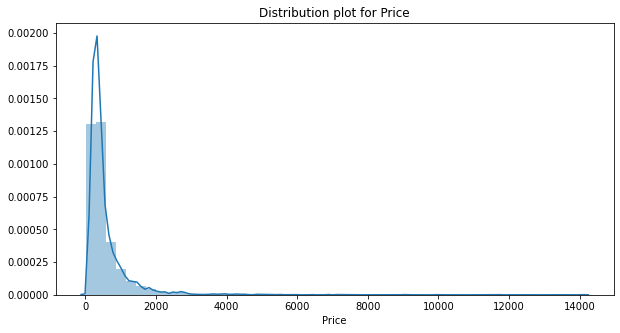

In [28]:
plt.figure(figsize=(10,5))
plt.xlabel('Price')
plt.title('Distribution plot for Price')
sns.distplot(df['Price'])
plt.show()

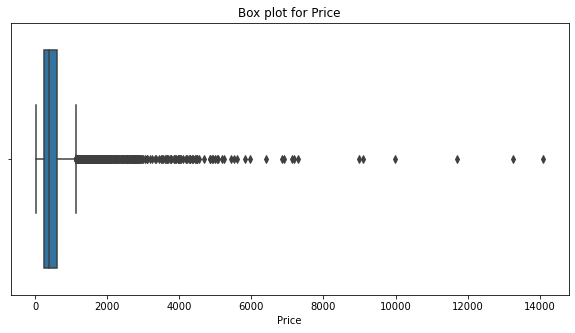

In [29]:

plt.figure(figsize=(10,5))
plt.title('Box plot for Price')
sns.boxplot(df['Price'])
plt.xlabel('Price')
plt.show()

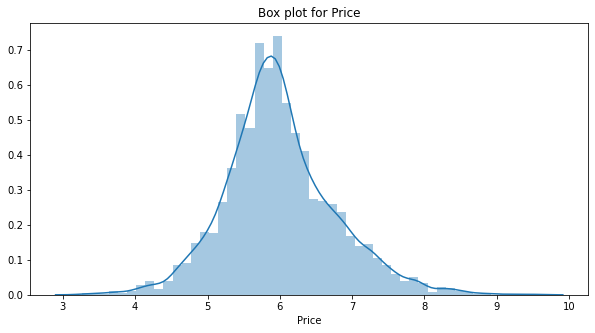

In [30]:
plt.figure(figsize=(10,5))
plt.title('Box plot for Price')
sns.distplot(np.log1p(df['Price']))
plt.xlabel('Price')
plt.show()

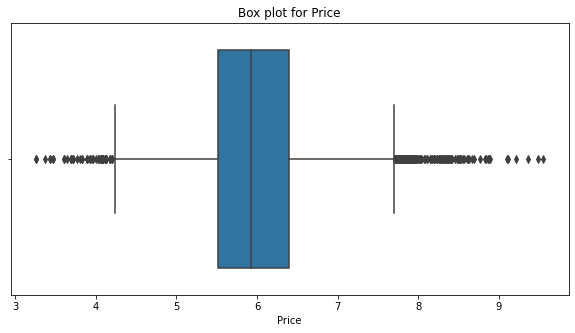

In [31]:

plt.figure(figsize=(10,5))
plt.title('Box plot for Price')
sns.boxplot(np.log1p(df['Price']))
plt.xlabel('Price')
plt.show()

In [32]:
df.isnull().sum()/df.shape[0]

Title           0.000000
Author          0.000000
Edition         0.000000
Rating          0.000000
Review          0.000000
Synopsis        0.000000
Genre           0.000000
BookCategory    0.000000
Price           0.200077
dtype: float64

In [33]:
df.nunique()

Title           6787
Author          4372
Edition         3882
Rating            36
Review           368
Synopsis        6771
Genre            363
BookCategory      11
Price           1614
dtype: int64

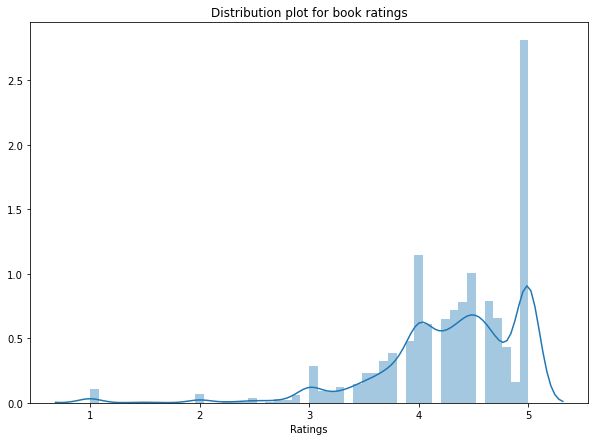

In [34]:
plt.figure(figsize=(10,7))
sns.distplot((df['Rating']))
plt.title('Distribution plot for book ratings')
plt.xlabel('Ratings')

plt.show()

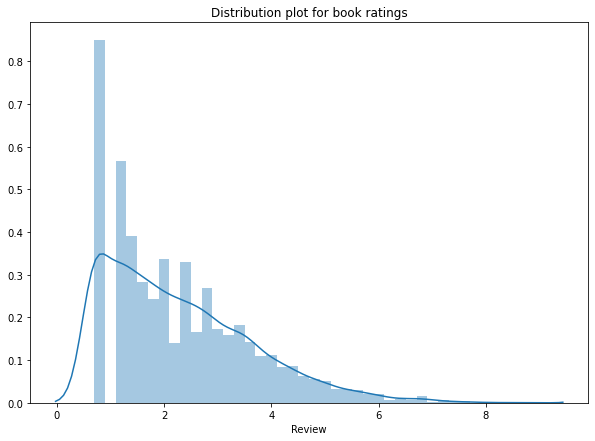

In [35]:
plt.figure(figsize=(10,7))
sns.distplot(np.log1p(df['Review']))
plt.title('Distribution plot for book ratings')
plt.xlabel('Review')

plt.show()

In [36]:
df['BookCategory'].value_counts()

Action & Adventure                      1036
Crime, Thriller & Mystery                878
Comics & Mangas                          744
Language, Linguistics & Writing          733
Biographies, Diaries & True Accounts     732
Romance                                  702
Humour                                   670
Computing, Internet & Digital Media      648
Arts, Film & Photography                 638
Sports                                   614
Politics                                 402
Name: BookCategory, dtype: int64

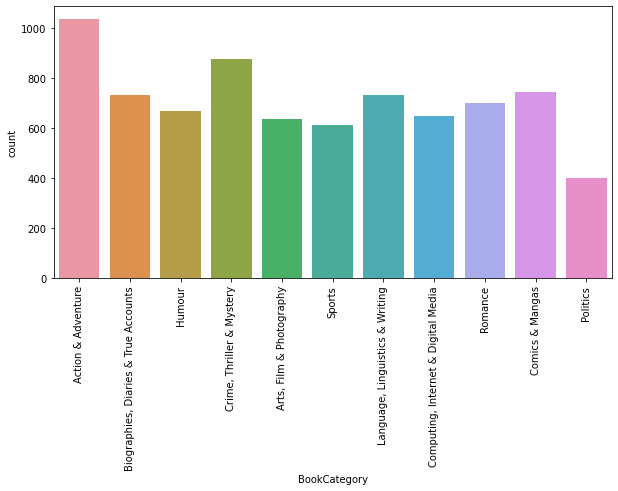

In [37]:
plt.figure(figsize=(10,5))
sns.countplot(df['BookCategory'])
plt.xticks(rotation=90)
plt.show()

Search for Author who writes more than 1 book

In [38]:
bk_au =[]
bk_tl =[]
for book_author in df['Author']:
    if book_author not in bk_au:
        bk_au.append(book_author)
    else:
        bk_tl.append(book_author)

In [39]:
df['Edition'].unique()

array(['Paperback,– 10 Mar 2016', 'Paperback,– 7 Nov 2012',
       'Paperback,– 25 Feb 1982', ..., 'Hardcover,– 11 Apr 2017',
       'Paperback,– 2 Jul 1999', 'Paperback,– 16 Sep 2016'], dtype=object)

In [40]:
df['Edition']= df['Edition'].map(lambda x : x.split(', ')[0])


In [41]:
df['cover_type'] =  df['Edition'].map(lambda x : x.split(',– ')[0])


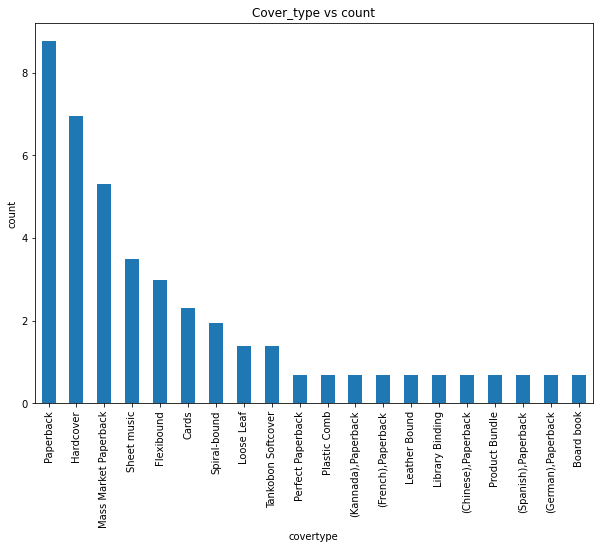

In [42]:
plt.figure(figsize=(10,7))
np.log1p(df['cover_type'].value_counts()).plot(kind='bar')
plt.title('Cover_type vs count')
plt.xlabel('covertype')
plt.ylabel('count')

plt.show()

In [43]:
df['BookCategory'].nunique()

11

In [44]:
gle = LabelEncoder()
bc_labels = gle.fit_transform(df['BookCategory'])
bc_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
bc_mappings

{0: 'Action & Adventure',
 1: 'Arts, Film & Photography',
 2: 'Biographies, Diaries & True Accounts',
 3: 'Comics & Mangas',
 4: 'Computing, Internet & Digital Media',
 5: 'Crime, Thriller & Mystery',
 6: 'Humour',
 7: 'Language, Linguistics & Writing',
 8: 'Politics',
 9: 'Romance',
 10: 'Sports'}

In [45]:
gle = LabelEncoder()
bg_labels = gle.fit_transform(df['Genre'])
bg_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
bg_mappings

{0: 'API & Operating Environments',
 1: 'Action & Adventure (Books)',
 2: 'Active Outdoor Pursuits (Books)',
 3: 'Aeronautical Engineering',
 4: 'Aesthetics',
 5: 'Agriculture & Farming (Books)',
 6: 'Air Sports (Books)',
 7: 'Algebra & Trigonometry',
 8: 'Algorithms',
 9: 'Alphabet Reference',
 10: 'Alternative Medicine (Books)',
 11: 'American Football (Books)',
 12: 'American Literature',
 13: 'Americas',
 14: 'Anatomy & Physiology',
 15: 'Ancient History (Books)',
 16: 'Anthologies (Books)',
 17: 'Anthropology (Books)',
 18: 'Archery (Books)',
 19: 'Architecture (Books)',
 20: 'Art Encyclopedias',
 21: 'Art History',
 22: 'Artificial Intelligence',
 23: 'Arts History, Theory & Criticism (Books)',
 24: 'Arts, Film & Photography (Books)',
 25: 'Asian History',
 26: 'Asian Literature',
 27: 'Astrology',
 28: 'Astronomy & Astrophysics',
 29: 'Astronomy (Books)',
 30: 'Atheism',
 31: 'Banks & Banking',
 32: 'Baseball (Books)',
 33: 'Basketball (Books)',
 34: 'Bioengineering',
 35: 'Biog

In [46]:
df['bc_Label'] = bc_labels

In [47]:
df['bg_label'] = bg_labels

In [48]:
gle = LabelEncoder()
ct_labels = gle.fit_transform(df['cover_type'])
ct_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
ct_mappings

{0: '(Chinese),Paperback',
 1: '(French),Paperback',
 2: '(German),Paperback',
 3: '(Kannada),Paperback',
 4: '(Spanish),Paperback',
 5: 'Board book',
 6: 'Cards',
 7: 'Flexibound',
 8: 'Hardcover',
 9: 'Leather Bound',
 10: 'Library Binding',
 11: 'Loose Leaf',
 12: 'Mass Market Paperback',
 13: 'Paperback',
 14: 'Perfect Paperback',
 15: 'Plastic Comb',
 16: 'Product Bundle',
 17: 'Sheet music',
 18: 'Spiral-bound',
 19: 'Tankobon Softcover'}

In [49]:
df['ct_label'] = ct_labels

In [50]:
df.columns

Index(['Title', 'Author', 'Edition', 'Rating', 'Review', 'Synopsis', 'Genre',
       'BookCategory', 'Price', 'cover_type', 'bc_Label', 'bg_label',
       'ct_label'],
      dtype='object')

In [51]:
a = ['Rating', 'Review', 'Price','bc_Label', 'bg_label','ct_label']
df2 = df[a]

In [52]:
df2['Price'].fillna(0,inplace=True)


C:\Users\PC\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [53]:
i = np.median(df2['Price'])
df2['Price'].replace(0,i,inplace=True)

C:\Users\PC\anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [54]:
df_ohe = pd.get_dummies(df2)

In [55]:
X = df_ohe.drop('Price',axis=1)
y = df_ohe['Price']

In [56]:
X_train,X_val,y_train,y_val = train_test_split(X,y,train_size=0.8,random_state=21)

In [57]:
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)

(6237, 5) (6237,)
(1560, 5) (1560,)


In [62]:
from sklearn.metrics import mean_squared_error ,r2_score, mean_absolute_error
rmse = np.sqrt(mean_squared_error(y_val,y_pred))

print("Root Mean Squared Error: ", rmse)
print("R2_score: ",r2_score(y_val,y_pred))
print("Mean Absolute Error:  ", mean_absolute_error(y_val,y_pred))

Root Mean Squared Error:  607.0581902273861
R2_score:  0.0375315480637316
Mean Absolute Error:   297.28931123282223


In [63]:
1- np.sqrt(np.square(np.log10(y_pred +1) - np.log10(y_val +1)).mean())

<ipython-input-63-d2933a8e0286>:1: RuntimeWarning: invalid value encountered in log10
  1- np.sqrt(np.square(np.log10(y_pred +1) - np.log10(y_val +1)).mean())


0.6915155046750581

In [65]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [66]:
lr = LinearRegression()
ls = Lasso()
rd = Ridge()
dr = DecisionTreeRegressor()
rr = RandomForestRegressor()

In [78]:
# model_ls = [(lr, 'Linear Regression'), (ls, 'Lasso'), (rd, 'Ridge'), (dr, 'Decision Tree Reg'), (rr, 'Random Forest Reg')]

# # Iterate ovwer each model
# for item in model_ls:
#     model = item[0]
#     name = item[1]
#     print(f'Running {name}')
#     print('')
    
#     # Train the model
#     model.fit(X_train, y_train)
    
#     # Predict the results
#     y_pred = model.predict(X_val)
    
#     # Calculate the root mean squared error
#     error = round(np.sqrt(mean_squared_error(y_val, y_pred)), 2)
    
#     # Print the value
#     print(f'Root mean squared error using {name} is {error}')
#     print('-'*100)
#     print('')
#     print("R2_score: ",r2_score(y_val,y_pred))
#     print('-'*100)
#     print('')
#     print("Mean Absolute Error:  ", mean_absolute_error(y_val,y_pred))
#     print('-'*100)
#     print('')
#     print(round(1- np.sqrt(np.square(np.log10(y_pred +1) - np.log10(y_val +1)).mean()),2))
#     print('-'*100)
#     print('')

In [82]:
def download_preds(preds_test, file_name):

  ## 1. Setting the target column with our obtained predictions
  ss[1] = preds_test

  ## 2. Saving our predictions to a csv file

  ss.to_csv(file_name, index = False)

  ## 3. Downloading and submitting the csv file
#   from google.colab import files
#   files.download(file_name)

In [83]:
lr.fit(X_train,y_train)

LinearRegression()

In [84]:
preds_test = lr.predict(X_val)

In [95]:
round(1- np.sqrt(np.square(np.log10(preds_test +1) - np.log10(y_val +1)).mean()),5)

<ipython-input-95-da5dc4af1f2b>:1: RuntimeWarning: invalid value encountered in log10
  round(1- np.sqrt(np.square(np.log10(preds_test +1) - np.log10(y_val +1)).mean()),5)


0.69152

In [85]:
download_preds(preds_test, 'lr.csv')


In [118]:
np.sqrt(mean_squared_error(y_val,preds_test_rr))

624.5374483071882

In [107]:
1 - np.sqrt(np.square(np.log10(preds_test +1) - np.log10(y_val +1)).mean())

<ipython-input-107-f75d441d60ff>:1: RuntimeWarning: invalid value encountered in log10
  1 - np.sqrt(np.square(np.log10(preds_test +1) - np.log10(y_val +1)).mean())


0.6915155046750581

In [93]:
dr.fit(X_train,y_train)

DecisionTreeRegressor()

In [94]:
preds_test_dr = lr.predict(X_val)

In [96]:
1 - np.sqrt(np.square(np.log10(preds_test_dr +1) - np.log10(y_val +1)).mean())

<ipython-input-96-10df1597ce98>:1: RuntimeWarning: invalid value encountered in log10
  1 - np.sqrt(np.square(np.log10(preds_test_dr +1) - np.log10(y_val +1)).mean())


0.6915155046750581

In [97]:
ls.fit(X_train,y_train)

Lasso()

In [98]:
preds_test_ls = ls.predict(X_val)

In [100]:
1 - np.sqrt(np.square(np.log10(preds_test_ls +1) - np.log10(y_val +1)).mean())

<ipython-input-100-d571711af6ed>:1: RuntimeWarning: invalid value encountered in log10
  1 - np.sqrt(np.square(np.log10(preds_test_ls +1) - np.log10(y_val +1)).mean())


0.69151830308097

In [101]:
rr.fit(X_train,y_train)

RandomForestRegressor()

In [102]:
preds_test_rr = rr.predict(X_val)

In [103]:
1 - np.sqrt(np.square(np.log10(preds_test_rr +1) - np.log10(y_val +1)).mean())

0.6990435383904565

In [119]:
download_preds(preds_test_rd, 'rd.csv')

In [104]:
rd.fit(X_train,y_train)

Ridge()

In [105]:
preds_test_rd = rr.predict(X_val)

In [106]:
1 - np.sqrt(np.square(np.log10(preds_test_rd +1) - np.log10(y_val +1)).mean())

0.6990435383904565